### This is a carte test


[![Binder](http://mybinder.org/badge_logo.svg)](http://mybinder.org/v2/gh/khouakhi/ewin_mex/master?filepath=Caret_demo.ipynb)

In [1]:
library(caret)
library(mlbench)
data(Sonar)

set.seed(107)
inTrain <- createDataPartition(
  y = Sonar$Class,
  ## the outcome data are needed
  p = .75,
  ## The percentage of data in the
  ## training set
  list = FALSE
)
## The format of the results

## The output is a set of integers for the rows of Sonar
## that belong in the training set.
str(inTrain)

Loading required package: lattice
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


 int [1:157, 1] 1 2 3 4 5 7 10 11 12 13 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr "Resample1"


In [2]:
training <- Sonar[ inTrain,]
testing  <- Sonar[-inTrain,]

nrow(training)
nrow(testing)


[1] 157

[1] 51

In [5]:
plsFit <- train(
  Class ~ .,
  data = training,
  method = "pls",
  ## Center and scale the predictors for the training
  ## set and all future samples.
  preProc = c("center", "scale")
)

In [7]:
plsFit <- train(
  Class ~ .,
  data = training,
  method = "pls",
  preProc = c("center", "scale"),
  ## added:
  tuneLength = 15
)

In [8]:
ctrl <- trainControl(method = "repeatedcv", repeats = 3)

plsFit <- train(
  Class ~ .,
  data = training,
  method = "pls",
  preProc = c("center", "scale"),
  tuneLength = 15,
  ## added:
  trControl = ctrl
)

In [9]:
ctrl <- trainControl(
  method = "repeatedcv", 
  repeats = 3,
  classProbs = TRUE, 
  summaryFunction = twoClassSummary
)

set.seed(123)
plsFit <- train(
  Class ~ .,
  data = training,
  method = "pls",
  preProc = c("center", "scale"),
  tuneLength = 15,
  trControl = ctrl,
  metric = "ROC"
)
plsFit

Partial Least Squares 

157 samples
 60 predictor
  2 classes: 'M', 'R' 

Pre-processing: centered (60), scaled (60) 
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 141, 141, 142, 142, 141, 142, ... 
Resampling results across tuning parameters:

  ncomp  ROC        Sens       Spec     
   1     0.8052910  0.7259259  0.6904762
   2     0.8479084  0.7495370  0.8005952
   3     0.8488426  0.7638889  0.7476190
   4     0.8355241  0.7652778  0.7357143
   5     0.8124173  0.7481481  0.7547619
   6     0.7887566  0.7236111  0.6988095
   7     0.7938161  0.7439815  0.6892857
   8     0.8012235  0.7393519  0.6982143
   9     0.7932126  0.7578704  0.6767857
  10     0.7895916  0.7412037  0.6904762
  11     0.7868386  0.7416667  0.7101190
  12     0.7773479  0.7365741  0.7148810
  13     0.7715608  0.7375000  0.7000000
  14     0.7678902  0.7175926  0.6904762
  15     0.7679729  0.7148148  0.6898810

ROC was used to select the optimal model using the largest val

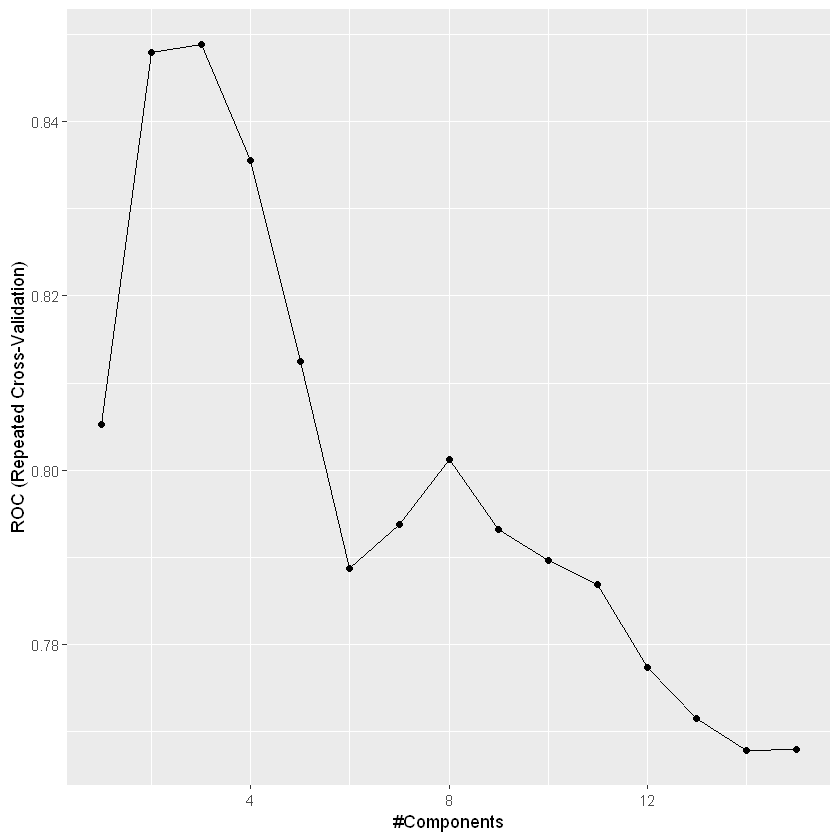

In [10]:
ggplot(plsFit)